In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import numpy as np
import calendar

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, для работы в проекте

In [3]:
# Установим параметры подключения к базе данных

db_config = {
    'user': 'praktikum_student',
    'pwd': 'Sdf4$2;d-d30pp',
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,
    'db': 'data-analyst-advanced-sql'
} 

# Формируем строку соединения с БД

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

Создание подключения

In [4]:
# Создаем движок

engine = create_engine(connection_string)

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [5]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [6]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


Вывести общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортировать по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [7]:
query = '''
SELECT 
    DATE_TRUNC('month', p.creation_date) AS month_date,
    SUM(p.views_count) AS total_views
FROM 
    stackoverflow.posts p
WHERE 
    EXTRACT(year FROM p.creation_date) = 2008
GROUP BY 
    1
ORDER BY 
    2 DESC;
'''

df = pd.read_sql(query, con=engine)

display(df)

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


`Данные за разные месяцы отличаются. Например, число просмотров в сентябре 2008 года составляет 452 928 568, в то время как число просмотров в июле 2008 года составляет всего 669 895`  

### Отличия могут быть связаны с разными факторами, например:  

* Количество опубликованных постов: возможно, что в одни месяцы пользователи сайта публиковали больше вопросов или ответов, чем в другие месяцы  
* Актуальность тематики: в некоторых месяцах могли быть более актуальные темы для пользователей, которые привлекали большее количество просмотров  
* Сезонность: некоторые темы могут быть более актуальны в определенное время года, что может влиять на количество просмотров в конкретный месяц  
* Различия между днями недели: количество просмотров может быть выше или ниже в зависимости от дня недели (например, в выходные дни может быть меньше просмотров)  

Это лишь несколько возможных причин различий в количестве просмотров за разные месяцы, поэтому необходимо проанализировать дополнительные данные и провести более детальное исследование

Нужно вывести имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя вывести количество уникальных значений `user_id`. Отсортировать результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [8]:
# напишите запрос
query = '''
SELECT u.display_name, COUNT(DISTINCT p.user_id) AS count
FROM stackoverflow.users u
JOIN stackoverflow.posts p ON p.user_id = u.id
WHERE p.creation_date <= u.creation_date + INTERVAL '1 month' AND p.post_type_id = 2
GROUP BY u.display_name
HAVING COUNT(*) > 100
ORDER BY u.display_name;
'''

df = pd.read_sql(query, con=engine)

display(df)

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
71,leppie,1
72,lomaxx,1
73,mattlant,1
74,paxdiablo,1


`Из аномалий можно отметить количество дубликатов в users_id` Возможно один и тот же пользователь регистрировался повторно

Вывести количество постов за 2008 год по месяцам. Отберать посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортировать таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [9]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', p.creation_date) AS month, COUNT(*) AS count
FROM stackoverflow.posts p
WHERE p.creation_date >= '2008-01-01' AND p.creation_date < '2009-01-01'
  AND p.user_id IN (
    SELECT DISTINCT p2.user_id
    FROM stackoverflow.posts p2
    WHERE p2.creation_date >= '2008-12-01' AND p2.creation_date < '2009-01-01'
  )
  AND p.user_id IN (
    SELECT id
    FROM stackoverflow.users
    WHERE creation_date >= '2008-09-01' AND creation_date < '2008-10-01'
  )
GROUP BY month
ORDER BY month DESC
'''
df = pd.read_sql(query, con=engine)

display(df)

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


# Задание 4

Используя данные о постах, вывести несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [10]:
# напишите запрос
query = '''
SELECT
  user_id,
  creation_date,
  views_count,
  SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM
  stackoverflow.posts
ORDER BY
  user_id,
  creation_date;
'''

df = pd.read_sql(query, con=engine)

display(df)

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


Найти среднее количество постов пользователей в день за август 2008 года. Отбрать данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывать. 

Отсортировать результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [11]:
# напишите запрос
query = '''
WITH active_users AS (
  SELECT user_id
  FROM stackoverflow.posts
  WHERE EXTRACT(YEAR FROM creation_date) = 2008
    AND EXTRACT(MONTH FROM creation_date) = 8
  GROUP BY user_id
  HAVING COUNT(*) > 120
),

daily_posts AS (
  SELECT user_id, DATE(creation_date) AS post_date, COUNT(*) AS post_count
  FROM stackoverflow.posts
  WHERE user_id IN (SELECT user_id FROM active_users)
    AND EXTRACT(YEAR FROM creation_date) = 2008
    AND EXTRACT(MONTH FROM creation_date) = 8
  GROUP BY user_id, post_date
)

SELECT user_id, AVG(post_count) AS avg_daily
FROM daily_posts
GROUP BY user_id
ORDER BY avg_daily ASC;
'''

# выполните запрос

df = pd.read_sql(query, con=engine)

display(df)

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [12]:
query = '''
SELECT ROUND(AVG(num_active_days)) AS result
FROM (
  SELECT COUNT(DISTINCT DATE(posts.creation_date)) AS num_active_days
  FROM stackoverflow.users
  JOIN stackoverflow.posts ON posts.user_id = users.id
  WHERE posts.creation_date BETWEEN '2008-12-01' AND '2008-12-07'
  GROUP BY users.id
) subquery;
'''
# выполните запрос

df = pd.read_sql(query, con=engine)

display(df)

,result
0,2.0


`Можно сделать вывод, что за первую неделюдекабря 2008 года каждый пользователь взаимодействовал с платформой в среднем по 2 дня`

Вывести историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортировать вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавить в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотреть внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [13]:
# напишите запрос
query = '''
SELECT 
  user_id,
  creation_date,
  CASE
    WHEN LAG(date_trunc('month', creation_date), 2) OVER (PARTITION BY user_id ORDER BY creation_date) IS NOT NULL THEN to_char(LAG(date_trunc('month', creation_date), 2) OVER (PARTITION BY user_id ORDER BY creation_date), 'Month')
    ELSE NULL
  END AS second_last_month
FROM stackoverflow.posts
ORDER BY user_id, creation_date;
'''

# выполните запрос

df = pd.read_sql(query, con=engine)

display(df)

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


Рассчитать аналог Retention Rate по месяцам для пользователей StackOverflow. Объединить пользователей в когорты по месяцу их первого поста. Возвращение определить по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [14]:
# Напишите запрос для извлечения retention rate
query = '''
WITH profile AS (
  SELECT 
    user_id,
    DATE_TRUNC('month', MIN(creation_date)) AS cohort_month,
    COUNT(*) OVER (PARTITION BY DATE_TRUNC('month', MIN(creation_date))) AS cohort_users_cnt
  FROM stackoverflow.posts
  GROUP BY user_id
), 
sessions AS (
  SELECT DISTINCT 
    user_id,
    DATE_TRUNC('month', creation_date) AS session_month
  FROM stackoverflow.posts
)
SELECT 
  p.cohort_month AS cohort_dt,
  s.session_month AS session_date,
  COUNT(DISTINCT s.user_id) AS users_cnt,
  p.cohort_users_cnt,
  ROUND(COUNT(DISTINCT s.user_id) * 100.0 / p.cohort_users_cnt, 2) AS retention_rate
FROM profile AS p
JOIN sessions AS s ON p.user_id = s.user_id AND s.session_month >= p.cohort_month
GROUP BY 1, 2, 4
ORDER BY 1, 2;
'''

# Выполните запрос
df = pd.read_sql(query, con=engine)

display(df)

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Построить тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулировать гипотезы о возможных причинах.

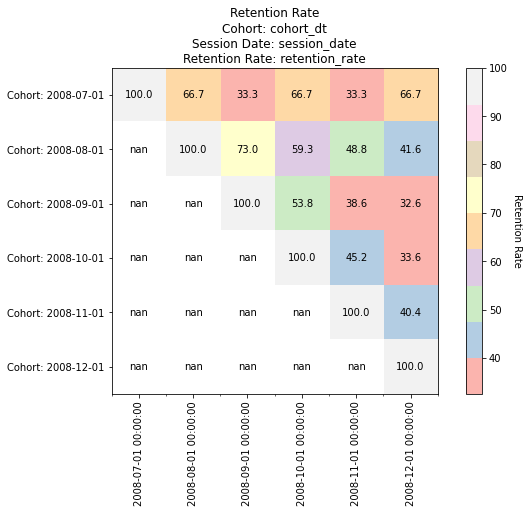

In [15]:
pivot_table = df.pivot("cohort_dt", "session_date", "retention_rate")

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Retention Rate\nCohort: cohort_dt\nSession Date: session_date\nRetention Rate: retention_rate')
im = ax.imshow(pivot_table, cmap='Pastel1')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table)))

y_labels = [f"Cohort: {dt.date()}" for dt in pivot_table.index]
ax.set_yticklabels(y_labels)

ax.set_xticklabels(pivot_table.columns)
ax.tick_params(axis="x", labelrotation=90)
ax.set_xticklabels(pivot_table.columns, ha="center", va="top")
ax.set_xticks(np.arange(-0.5, len(pivot_table.columns)), minor=True)

for i in range(len(pivot_table)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, format(pivot_table.iloc[i, j], ".1f"),
                       ha="center", va="center",
                       color="black")

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Retention Rate", rotation=-90, va="bottom")

plt.show()

**Задача была: Рассчитайте Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце.**

Для начала уточним значение Retention Rate (коэффициент удержания) - это метрика, которая измеряет процент пользователей или клиентов, которые остаются верными изучаемому продукту или услуге в течение определенного периода времени  

Retention Rate позволяет определить степень удержания клиентов и построить стратегии для увеличения этого показателя  
Чем выше Retention Rate, тем больше пользователей или клиентов сохраняют свою лояльность к продукту или услуге  

Это также означает, что можно сократить затраты на привлечение новых пользователей или клиентов, поскольку сохранение существующих клиентов обходится дешевле  

**Исходя из графика Retention Rate по месяцам для пользователей StackOverflow, можно сделать следующие выводы и гипотезы:**

* В целом, уровень возврата пользователей довольно низкий на протяжении всего периода исследования. Это может быть связано с тем, что StackOverflow является ресурсом для решения конкретных задач, а не для общения или развлечения, поэтому пользователи не стараются возвращаться на сайт после того, как решили свою проблему  

* `Пользователи, зарегистрировавшиеся в июле, имеют самый высокий и стабильный показатель в использовании StackOverflow `. Это может быть связано с тем, что эта когорта была одной из первых на сайте, и поэтому ее участники имеют более высокую лояльность к платформе 

* Уровень возврата в последующие месяцы оставался довольно низким, что может указывать на то, что пользователи не видят достаточно новых и интересных материалов на сайте, или уходят на другие ресурсы, которые могут быть более актуальными для их нужд

**На основании этих выводов можно сделать гипотезу о том, что для увеличения уровня возврата пользователей на сайт необходимо постоянно обновлять контент и добавлять новые функции, которые будут привлекать и удерживать пользователей на платформе. Также возможно стоит рассмотреть способы повышения лояльности пользователей к StackOverflow, например, через программы лояльности или персонализированный контент**

На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [16]:
# напишите запрос
query = '''
SELECT 
  EXTRACT(MONTH FROM creation_date) AS creation_month,
  COUNT(*) AS posts_count,
  ROUND(((COUNT(*)::NUMERIC / LAG(COUNT(*)) OVER (ORDER BY EXTRACT(MONTH FROM creation_date))) - 1) * 100, 2) AS percentage
FROM stackoverflow.posts
WHERE 
  EXTRACT(YEAR FROM creation_date) = 2008 AND 
  EXTRACT(MONTH FROM creation_date) BETWEEN 9 AND 12
GROUP BY EXTRACT(MONTH FROM creation_date)
ORDER BY EXTRACT(MONTH FROM creation_date);
'''

# выполните запрос

df = pd.read_sql(query, con=engine)

display(df)

,creation_month,posts_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Построить круговую диаграмму с количеством постов по месяцам.

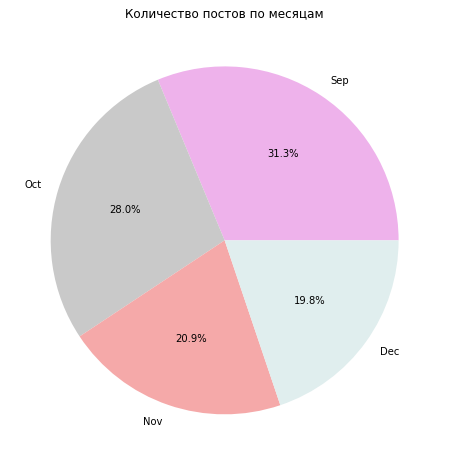

In [17]:
# постройте круговую диаграмму с количеством постов по месяцам


colors = ['#EEB2EB', '#C9C9C9', '#F5A9A9', '#E0EEEE']


posts_count = df["posts_count"].tolist()


months = df["creation_month"].apply(lambda x: calendar.month_abbr[int(x)]).tolist()

plt.figure(figsize=(8, 8))
plt.pie(posts_count, labels=months, colors=colors, autopct="%1.1f%%")
plt.title("Количество постов по месяцам")
plt.show()

Выгрузить данные активности пользователя, который опубликовал больше всего постов за всё время. Вывести данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [18]:
# напишите запрос
query = '''
SELECT users.id, users.display_name, MAX(posts.creation_date) AS last_post_date
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
WHERE EXTRACT(MONTH FROM posts.creation_date) = 10 
  AND EXTRACT(YEAR FROM posts.creation_date) = 2008 
GROUP BY users.id, users.display_name
ORDER BY COUNT(*) DESC
LIMIT 1;

'''

# выполните запрос

df = pd.read_sql(query, con=engine)

display(df)

,id,display_name,last_post_date
0,22656,Jon Skeet,2008-10-31 22:16:01


In [19]:
query = '''
SELECT 
  TO_CHAR(creation_date, 'IW') AS week_number,
  MAX(TO_CHAR(creation_date, 'YYYY-MM-DD HH24:MI:SS')) AS last_post_date
FROM stackoverflow.posts
WHERE 
  user_id = (
    SELECT user_id
    FROM (
      SELECT user_id, COUNT(*) as num_posts
      FROM stackoverflow.posts
      WHERE EXTRACT(MONTH FROM creation_date) = 10 AND EXTRACT(YEAR FROM creation_date) = 2008
      GROUP BY user_id
      ORDER BY num_posts DESC
      LIMIT 1
    ) subquery
  ) AND
  EXTRACT(MONTH FROM creation_date) = 10 AND EXTRACT(YEAR FROM creation_date) = 2008 AND
  TO_CHAR(creation_date, 'IW') BETWEEN '40' AND '44'
GROUP BY TO_CHAR(creation_date, 'IW')
ORDER BY TO_CHAR(creation_date, 'IW');
'''

# выполните запрос
df = pd.read_sql(query, con=engine)

display(df)

,week_number,last_post_date
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
